# Diabetes Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


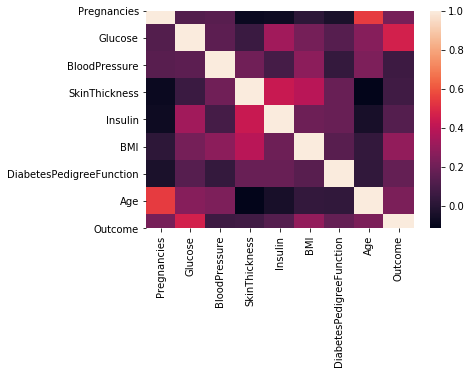

In [8]:
sns.heatmap(df.corr())

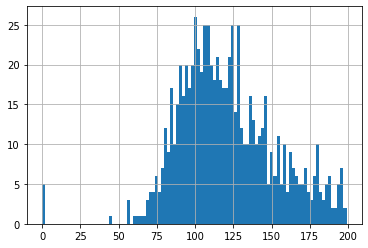

In [9]:
df['Glucose'].hist(bins=100)

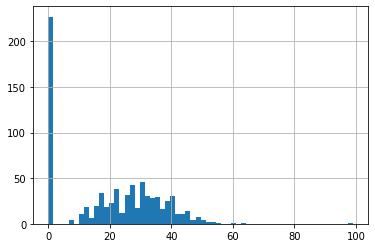

In [10]:
df['SkinThickness'].hist(bins=60)

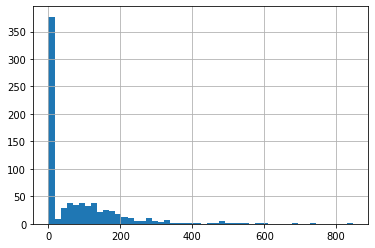

In [11]:
df['Insulin'].hist(bins=50)

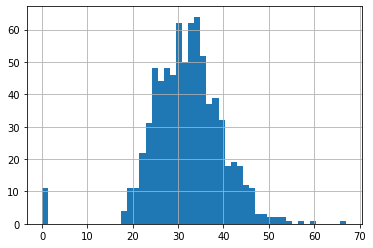

In [12]:
df['BMI'].hist(bins=50)

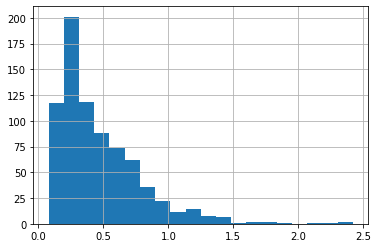

In [13]:
df['DiabetesPedigreeFunction'].hist(bins=20)

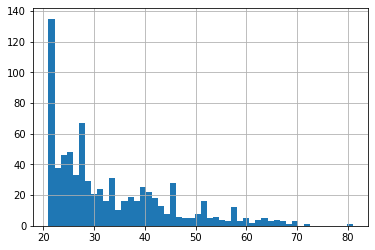

In [14]:
df['Age'].hist(bins=50)

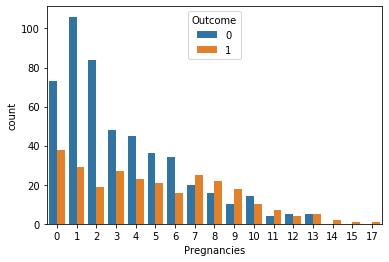

In [15]:
sns.countplot(x = df['Pregnancies'],hue=df['Outcome'])

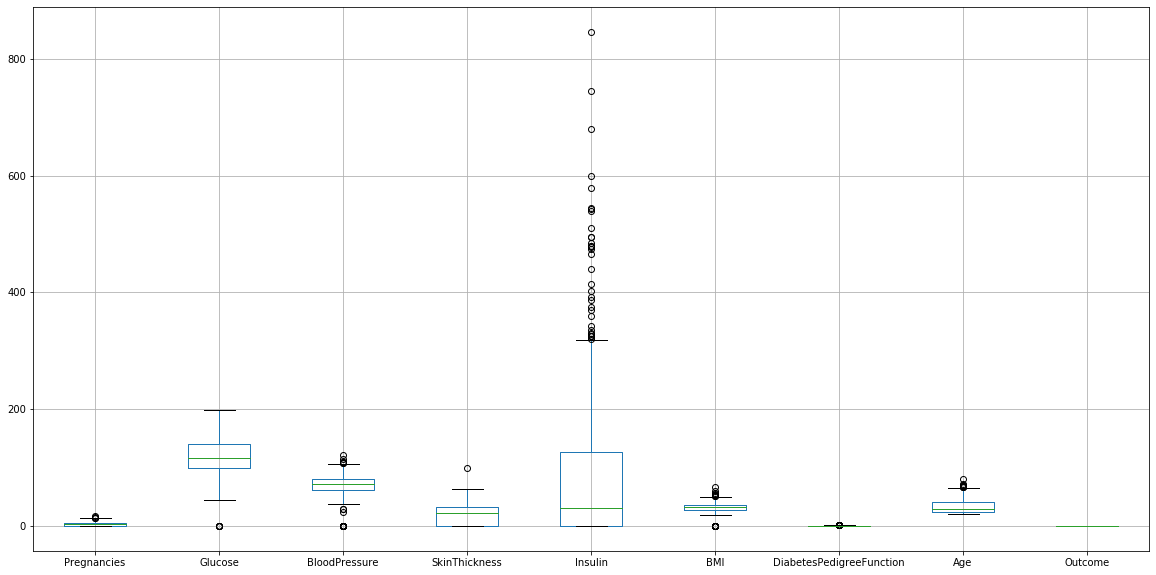

In [16]:
df.boxplot(figsize=(20,10))

Creating the features dataframe and Labels dataframe

In [17]:
X = df.drop(['Outcome','SkinThickness'],axis=1)
# as outcome is the label and there is not much correlation between skinthickness and outcome

In [18]:
Y = df['Outcome']

Splitting the dataset into train and test datasets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state = 999)

We can observe that, apart from pregnancy, some features have zero as value which is not correct as those features cannot be zero, so, those can be treated as missing values and can be imputed

In [21]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_tr = fill_values.fit_transform(X_train.drop('Pregnancies', axis=1))
X_te = fill_values.fit_transform(X_test.drop('Pregnancies',axis=1))


C:\Users\suryaavinash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
X_train = np.hstack((X_tr,np.asarray(X_train['Pregnancies']).reshape(-1,1)))
X_test = np.hstack((X_te,np.asarray(X_test['Pregnancies']).reshape(-1,1)))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.fit_transform(X_test)

Training different models to find better accuracy

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
s = SVC(kernel='linear')

In [29]:
for i in [lgr,dtc,rfc,s]:
    print('for',i,':\n')
    i.fit(X_train, y_train)
    p = i.predict(X_train)
    print('Train Accuracy ', accuracy_score(y_train, p))
    pt = i.predict(X_test)
    print('Test Accuracy ', accuracy_score(y_test, pt))
    print('Confusion Matrix:\n',confusion_matrix(y_test,pt))
    print('\n\n')
    
    
    

for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) :



C:\Users\suryaavinash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy  0.7672253258845437
Test Accuracy  0.7965367965367965
Confusion Matrix:
 [[139  17]
 [ 30  45]]



for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') :

Train Accuracy  1.0
Test Accuracy  0.658008658008658
Confusion Matrix:
 [[108  48]
 [ 31  44]]



for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
     

Training the model with good accuracy (Logistic Regression)

In [30]:
lgr.fit(X_train, y_train)
pred = lgr.predict(X_train)
predictions = lgr.predict(X_test)

C:\Users\suryaavinash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
accuracy_score(y_test,predictions)

0.7965367965367965

In [32]:
confusion_matrix(y_test,predictions)

array([[139,  17],
       [ 30,  45]], dtype=int64)

Making a Prediction

In [33]:
input_data = [2,157,68,171,23.7,0.426,28]

input_data = np.asarray(input_data)

#The data is treated as 7 instances of a single feature, so data needs to be reshaped
input_data = input_data.reshape(1,-1)

input_data

array([[  2.   , 157.   ,  68.   , 171.   ,  23.7  ,   0.426,  28.   ]])

In [34]:
input_data = scaler.fit_transform(input_data)

In [35]:
predictions_for_input_data = lgr.predict(input_data)

In [36]:
if (predictions_for_input_data[0] == 0):
  print('The person is not prone to diabetes')
else:
  print('The person is prone to diabetes')

The person is not prone to diabetes
